# Thursday, Week 2: HW 9
# What matters to you?


__Task:__ Think of a quantitative question you'd like to know the answer to, a problem you'd like to solve, a task you'd like to perform, or a puzzle you'd like to crack. It can be anything (it doesn't have to be related to science)... so long as it *matters* to *you*. Then, take a crack at solving it using Python! 

You might discover that it will take you far longer than a single day to answer your question, or you'll find that you can tackle it in a single evening. Both are worth celebrating. If your question is very big, start by breaking it up into bite-sized goals and tackling them one at a time. If your question is quick to answer, brainstorm a follow-up you'd like to solve next. Follow your curiosity where it takes you and be bold, be brave, don't fake. Do something that *you* care about. Do it as authentically and earnestly as you possibly can. You'll be amazed at where that path will take you. 

The task you choose is entirely up to you. In order to meet the requirements of the Pre-College Program and pass the course, (as with all assignments) you must submit your own, individual, complete work for this homework and demonstrate a strong effort to make progress. Your work should show basic mastery of many of the concepts covered in the course (though it is alright if you don't touch on all of them; for instance, it's okay if your project doesn't require you to make any plots). In other words, the task you choose to tackle should be complex enough that it invokes many of the topics we covered in class. 

If you would like some help brainstorming questions/approaches, be sure to attend section and/or office hours, or send Charles/Nina an email. 

__Tell us about your question/problem/task/puzzle and why it's important or interesting to you:__ 

In [3]:
# TODO convert to a markdown cell and answer the question above here.

__How will you approach your question/problem/task/puzzle? What would you like to accomplish?__

In [4]:
# TODO convert to a markdown cell and answer the question above here.

__Take a crack at it with Python!__ 

In [5]:
# imports
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import requests
import collections
# This gives us our "soup" which contains all the html in a way that we can find things
main_link = "https://www.foodnetwork.com/recipes/photos/30-minute-dinner-recipes"
response = requests.get(main_link)
response = response.content
soup = BeautifulSoup(response,'html.parser')

# Extract all of the links for the recipes on this url (website)
links_located = soup.find_all(class_="o-PhotoGalleryPromo__a-Cta")
recipes_links = list(map(lambda x: "https:" + x.find("a").get('href'),links_located))

# Go through each of the links (recipes) in our links (recipes) list
recipes_dictionary = {}
for link in recipes_links:
    response = requests.get(link)
    response = response.content
    soup = BeautifulSoup(response,'html.parser')
    name = soup.find(class_="o-AssetTitle__a-HeadlineText").text
    level_time = soup.find_all(lambda tag: tag.name == 'span' and 
                               tag.get('class') == ['o-RecipeInfo__a-Description'])[:2]
    level, time = list(map(lambda x: x.text,level_time))
    try:
        time = int(time.split(" ")[1])
    except:
        continue
    if level == "Easy":
        if time not in recipes_dictionary:
            recipes_dictionary[time] = 1
        else:
            recipes_dictionary[time] += 1

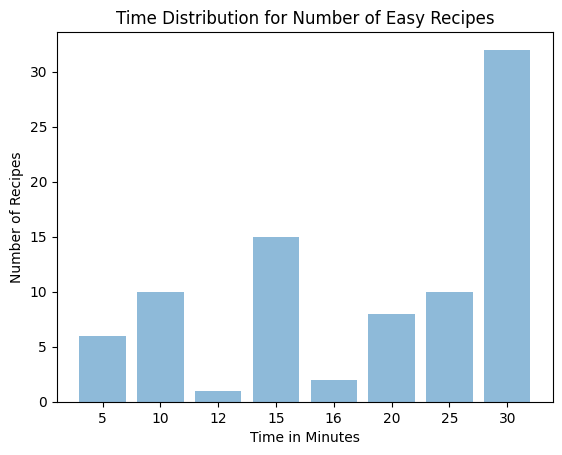

In [8]:
# Create bar graph of amount of recipes that have a given time
recipes_dictionary = collections.OrderedDict(sorted(recipes_dictionary.items()))
# d = {'57481': 50, '57480': 89, '57483': 110, '57482': 18, '57485': 82, '57484': 40}
# d_sorted = {key:value for key, value in sorted(d.items(), key=lambda item: int(item[0]))}
# d_sorted
# {'57480': 89, '57481': 50, '57482': 18, '57483': 110, '57484': 40, '57485': 82}
objects = recipes_dictionary.keys()
y_pos = np.arange(len(objects))
frequencies = recipes_dictionary.values()

plt.bar(y_pos, frequencies, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Recipes')
plt.xlabel('Time in Minutes')
plt.title('Time Distribution for Number of Easy Recipes')
plt.show()

__Where will your question/problem/task/puzzle take you next?__ 

In [ ]:
# TODO convert to a markdown cell and answer the question above here.

__What topics from the course (if any) would you like to review tomorrow?__

In [ ]:
# TODO convert to a markdown cell and answer the question above here.

__Feedback__: Please write a few words/lines for today's guest speaker -- EUGENE -- that I can include in a thank you card for him from our class. 

__Feedback__: Please write a few words/lines for NINA that I can include in a thank you card for her from our class. 